In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset
data_path = "population-data.csv"
population_data = pd.read_csv(data_path)

# Display the dataset structure
print("Dataset Head:")
print(population_data.head())

Dataset Head:
  Country (or dependency)  Population (2020) Yearly Change  Net Change  \
0                   China         1440297825        0.39 %     5540090   
1                   India         1382345085        0.99 %    13586631   
2           United States          331341050        0.59 %     1937734   
3               Indonesia          274021604        1.07 %     2898047   
4                Pakistan          221612785        2.00 %     4327022   

   Density (P/Km²)  Land Area (Km²)  Migrants (net) Fert. Rate Med. Age  \
0              153          9388211       -348399.0        1.7       38   
1              464          2973190       -532687.0        2.2       28   
2               36          9147420        954806.0        1.8       38   
3              151          1811570        -98955.0        2.3       30   
4              287           770880       -233379.0        3.6       23   

  Urban Pop % World Share  
0        61 %     18.47 %  
1        35 %     17.70 %  
2     

In [3]:
# === NumPy Section === #


# Convert relevant columns to NumPy arrays
population = np.array(population_data['Population (2020)'])
land_area = np.array(population_data['Land Area (Km²)'])

# Basic Operations
print("Population + 10:", population + 10)
print("Population / Land Area:", population / land_area)

# Statistical Operations
print("Mean Population:", np.mean(population))
print("Median Population:", np.median(population))
print("Standard Deviation of Population:", np.std(population))
print("Maximum Population:", np.max(population))
print("Minimum Population:", np.min(population))

# Reshaping Arrays
reshaped_population = population.reshape(-1, 1)
print("Reshaped Population Array:", reshaped_population)

# Broadcasting Example
population_density = population / land_area
print("Population Density (NumPy):", population_density)



--- NumPy Section ---
Population + 10: [1440297835 1382345095  331341060  274021614  221612795  212821996
  206984357  164972358  145945534  129166038  126407432  115434454
  109830334  102659136   97490023   90003964   84495253   84176939
   83830982   69830789   67948292   65298940   60446045   60012410
   59436735   54473263   53968749   51276987   50976258   46757990
   45974941   45267459   43984579   44019273   43686587   40372781
   39074290   37839265   37799417   36985634   34905952   33551834
   33050221   33032085   32436973   31398821   31181438   29935478
   29225206   28421591   27808405   26655093   26486292   25798598
   25550693   24346478   23824379   21428980   20997303   20346116
   19214618   19211435   19144615   18815241   18468267   17971392
   17688609   17571063   17141554   16816549   16758458   16502887
   15965858   14899781   13191289   13005313   12175490   11948464
   11839928   11700217   11598461   11426366   11325401   11216260
   10866677   10712491

/var/folders/k8/lq3sh67104n34dn13hr52z8w0000gn/T/ipykernel_20617/3088097383.py:10: RuntimeWarning: divide by zero encountered in divide
  print("Population / Land Area:", population / land_area)
/var/folders/k8/lq3sh67104n34dn13hr52z8w0000gn/T/ipykernel_20617/3088097383.py:24: RuntimeWarning: divide by zero encountered in divide
  population_density = population / land_area


In [4]:
# === Pandas Section === #


print("\n--- Pandas Section ---")

# Display Basic Information
print("DataFrame Info:")
print(population_data.info())

# Summary Statistics
print("Summary Statistics:")
print(population_data.describe())

# Filtering Data
high_population = population_data[population_data['Population (2020)'] > 300000000]
print("Countries with Population > 300 Million:\n", high_population)

# Adding a New Column
population_data['Population Density'] = population_data['Population (2020)'] / population_data['Land Area (Km²)']
print("Updated DataFrame with Population Density:\n", population_data.head())

# Handling Missing Data
print("Missing Values Count:")
print(population_data.isnull().sum())

# Fill missing values in Migrants column with 0
population_data['Migrants (net)'].fillna(0, inplace=True)
print("Updated DataFrame after Handling Missing Data:\n", population_data.head())

# Grouping and Aggregation
agg = population_data.groupby('Urban Pop %').agg({'Population (2020)': 'sum', 'Land Area (Km²)': 'mean'})
print("Grouped Aggregation:\n", agg)

# Sorting DataFrame
sorted_df = population_data.sort_values(by='Population (2020)', ascending=False)
print("Sorted DataFrame by Population:\n", sorted_df.head())



--- Pandas Section ---
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           235 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
 11  Population Density       235 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 22.2+ KB
None
Summary Statistics:
       Popu

/opt/miniconda3/lib/python3.12/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)



--- Matplotlib Section ---


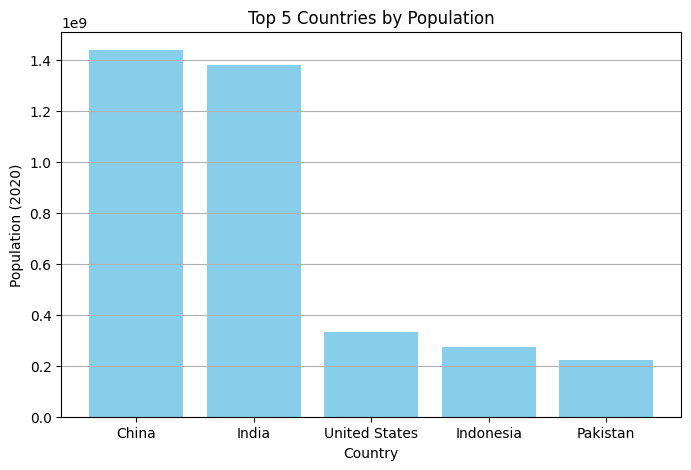

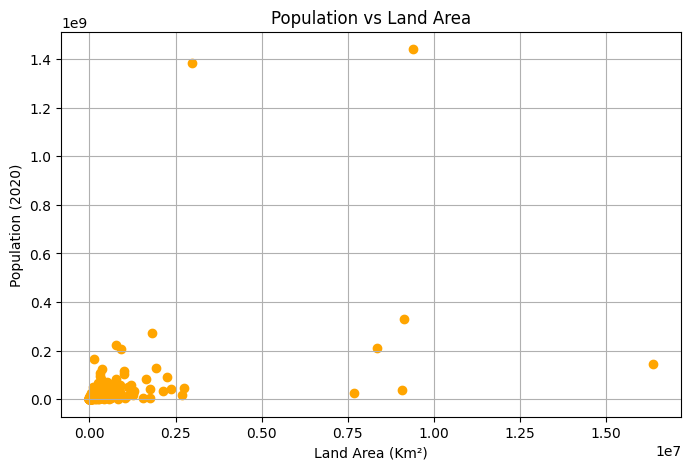

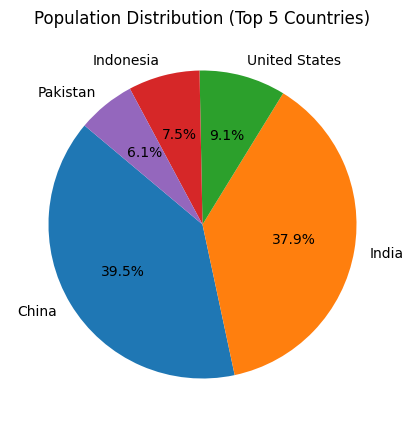

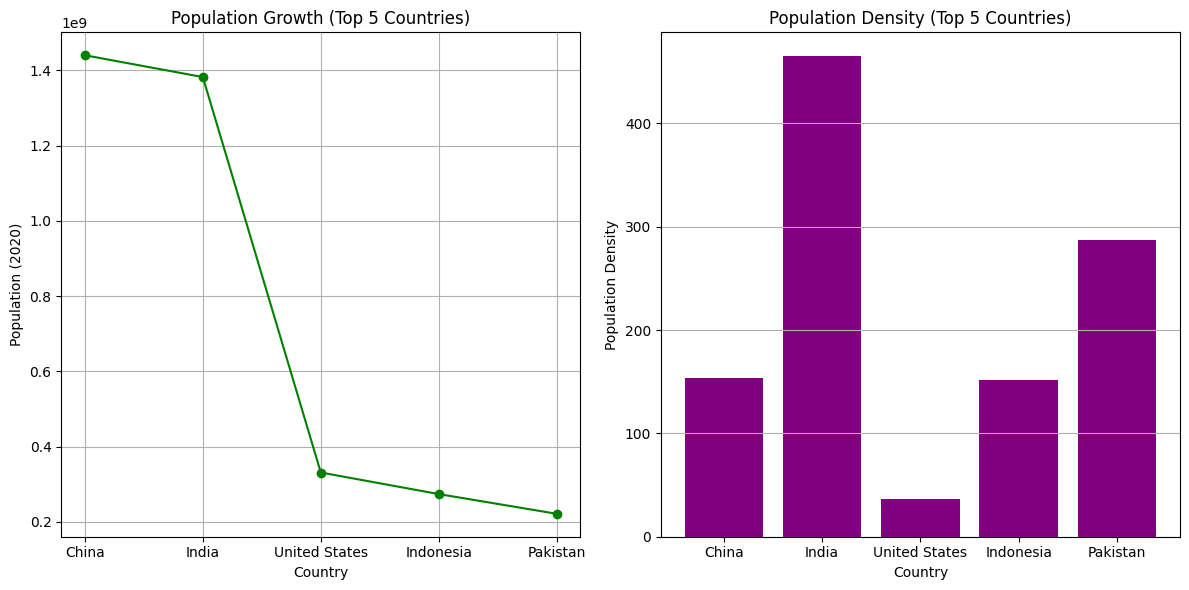

In [5]:
# === Matplotlib Section === #
print("\n--- Matplotlib Section ---")

# Bar Plot: Population by Top 5 Countries
plt.figure(figsize=(8, 5))
plt.bar(sorted_df['Country (or dependency)'][:5], sorted_df['Population (2020)'][:5], color='skyblue')
plt.title('Top 5 Countries by Population')
plt.xlabel('Country')
plt.ylabel('Population (2020)')
plt.grid(axis='y')
plt.show()

# Scatter Plot: Population vs Land Area
plt.figure(figsize=(8, 5))
plt.scatter(population_data['Land Area (Km²)'], population_data['Population (2020)'], color='orange')
plt.title('Population vs Land Area')
plt.xlabel('Land Area (Km²)')
plt.ylabel('Population (2020)')
plt.grid()
plt.show()

# Pie Chart: Population Distribution of Top 5 Countries
plt.figure(figsize=(8, 5))
plt.pie(sorted_df['Population (2020)'][:5], labels=sorted_df['Country (or dependency)'][:5], autopct='%1.1f%%', startangle=140)
plt.title('Population Distribution (Top 5 Countries)')
plt.show()

# Subplots Example
plt.figure(figsize=(12, 6))

# Line Plot
plt.subplot(1, 2, 1)
plt.plot(sorted_df['Country (or dependency)'][:5], sorted_df['Population (2020)'][:5], marker='o', color='green')
plt.title('Population Growth (Top 5 Countries)')
plt.xlabel('Country')
plt.ylabel('Population (2020)')
plt.grid()

# Bar Plot
plt.subplot(1, 2, 2)
plt.bar(sorted_df['Country (or dependency)'][:5], sorted_df['Population Density'][:5], color='purple')
plt.title('Population Density (Top 5 Countries)')
plt.xlabel('Country')
plt.ylabel('Population Density')
plt.grid(axis='y')

plt.tight_layout()
plt.show()
